In [65]:
import pandas as pd 

In [66]:
data = pd.read_excel(r'C:\Users\Lenovo\Documents\Tasnim\keto\keto.xlsx')

In [67]:
df = pd.DataFrame(data)

In [68]:
# berechnet für mehrere Lebensmittel deren inhatl und gibt sie zurück (name, fat, carbs, protei)
def anteil(input):
    
    anteil = []
    for lebensmittel in input: 

        result =  df[df["name"] == lebensmittel[0]]
    
    # wenn lebensmittel nicht im Dataframe vorhanden ist:
        if result.values.shape[0] == 0:
            print(f'Es gibt kein Nahrungsmittels mit diesen Name {lebensmittel[0]}' )

    # wennn die Menge nummber ist also 100g  und nicht medium ist.
        elif isinstance(result["menge"].values[0], int):
            fatanteil = lebensmittel[1] * result["fat"].values[0] / result["menge"].values[0]
            carbsanteil = lebensmittel[1] * result["carbs"].values[0] / result["menge"].values[0]
            proteinanteil = lebensmittel[1] * result["protein"].values[0] / result["menge"].values[0]
            anteil.append([lebensmittel[0], fatanteil, carbsanteil, proteinanteil])
        else: 
            fatanteil = lebensmittel[1] * result["fat"].values[0] 
            carbsanteil = lebensmittel[1] * result["carbs"].values[0] 
            proteinanteil = lebensmittel[1] * result["protein"].values[0]
            anteil.append([lebensmittel[0], fatanteil, carbsanteil, proteinanteil])
    return anteil
    


In [69]:
# summiert die inhalte zusammen und gibt sie einzeln und als summe zusammen 
def summ(input:list):
    fatssume = 0
    carbssumme= 0
    proteinsumme = 0
    for lebensmittel in input:
        fatssume += lebensmittel[1]
        carbssumme += lebensmittel[2]
        proteinsumme += lebensmittel[3]

    print(f'fats: {fatssume}, carbs: {carbssumme}, protein: {proteinsumme}')
    return[fatssume, carbssumme, proteinsumme]

In [70]:
df

,name,menge,fat,carbs,protein,kcal
0,broccoli,100,0.2,2.7,3.80,26.0
1,egg,Medium,4.2,0.3,5.50,63.0
2,zucchini,100,0.4,2.7,1.20,15.0
3,butter,100,82.0,0.7,0.60,743.0
4,sardine,100,27.0,0.5,20.00,326.0
5,coconut oil,100,92.0,0.5,0.50,827.0
6,schmand gelb,100,24.0,3.3,2.70,242.0
7,schmand blau,100,30.0,3.0,2.50,292.0
8,mayo,100,77.0,2.3,0.80,705.0
9,quark,100,9.6,3.2,8.70,133.0


## HIER SOLLTE MAN DIE INFO ANGEBEN

In [71]:
tasnimsFat = 135 
tasnimsCarbs = 20 
tasnimsProtein = 81 

38 
tasnimsfood = anteil([("egg", 2),("meat",50), ("tahini", 30)])
print("TASNIM")
summ(tasnimsfood)
print("-----------------------------------------------------------------------------")
#################################################################################

joumansFat = 200
joumansCarbs = 30
joumansProtein = 120 

joumansfood = anteil([("egg", 2),("ghee", 15) , ("coconut raspel", 15)])
print("JOUMAN")
summ(joumansfood)
print("-------------------------------------------------------------------------------")

TASNIM
fats: 152.04, carbs: 12.13, protein: 89.0909
-----------------------------------------------------------------------------
JOUMAN
fats: 183.75000000000003, carbs: 15.147, protein: 102.25599999999999
-------------------------------------------------------------------------------


fats: 152.04, carbs: 12.13, protein: 89.0909
fats: 183.75000000000003, carbs: 15.147, protein: 102.25599999999999


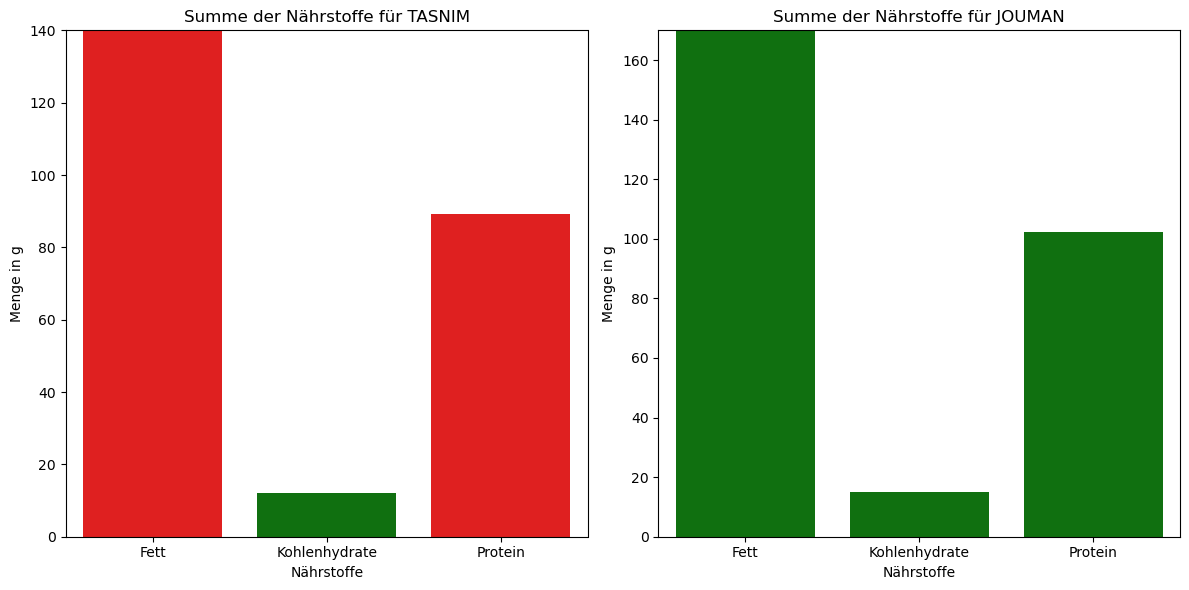

In [72]:
    
import matplotlib.pyplot as plt
import seaborn as sns                            

fat_sum, carbs_sum, protein_sum = summ(tasnimsfood)
color_fat = 'red' if fat_sum > tasnimsFat else 'green'
color_carbs = 'red' if carbs_sum > tasnimsCarbs else 'green'
color_protein = 'red' if protein_sum > tasnimsProtein else 'green'

# Erstellen von zwei Plots nebeneinander
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Erster Plot
sns.barplot(x=["Fett", "Kohlenhydrate", "Protein"], y=[fat_sum, carbs_sum, protein_sum],hue=["Fett", "Kohlenhydrate", "Protein"], palette=[color_fat, color_carbs, color_protein], ax=axs[0], legend=False)
axs[0].set_ylim(0, 140)
axs[0].set_xlabel("Nährstoffe")
axs[0].set_ylabel("Menge in g")
axs[0].set_title("Summe der Nährstoffe für TASNIM")

#################################################################################################################################################################


fat_sum, carbs_sum, protein_sum = summ(joumansfood)
color_fat = 'red' if fat_sum > joumansFat else 'Green'
color_carbs = 'red' if carbs_sum > joumansCarbs else 'green'
color_protein = 'red' if protein_sum > joumansProtein else 'green'

# Zweiter Plot (optional, ein Beispielplot)
sns.barplot(x=["Fett", "Kohlenhydrate", "Protein"], y=[fat_sum, carbs_sum, protein_sum],hue=["Fett", "Kohlenhydrate", "Protein"], palette=[color_fat, color_carbs, color_protein], ax=axs[1],legend=False)
axs[1].set_ylim(0, 170)
axs[1].set_xlabel("Nährstoffe")
axs[1].set_ylabel("Menge in g")
axs[1].set_title("Summe der Nährstoffe für JOUMAN")

# Layout anpassen
plt.tight_layout()

# Plots anzeigen
plt.show()